In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("O:/virtual_intern/Codsoft-Machine Learning/Credit Card Fraud/fraudTrain.csv")
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df1.shape

(1296675, 23)

In [4]:
df2 = pd.read_csv("O:/virtual_intern/Codsoft-Machine Learning/Credit Card Fraud/fraudTest.csv")
df2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df2.shape

(555719, 23)

In [6]:
df_complete = pd.concat([df1, df2])
print(df_complete.shape)
print(df_complete.columns)

(1852394, 23)
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [7]:
df_complete.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
df_complete.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

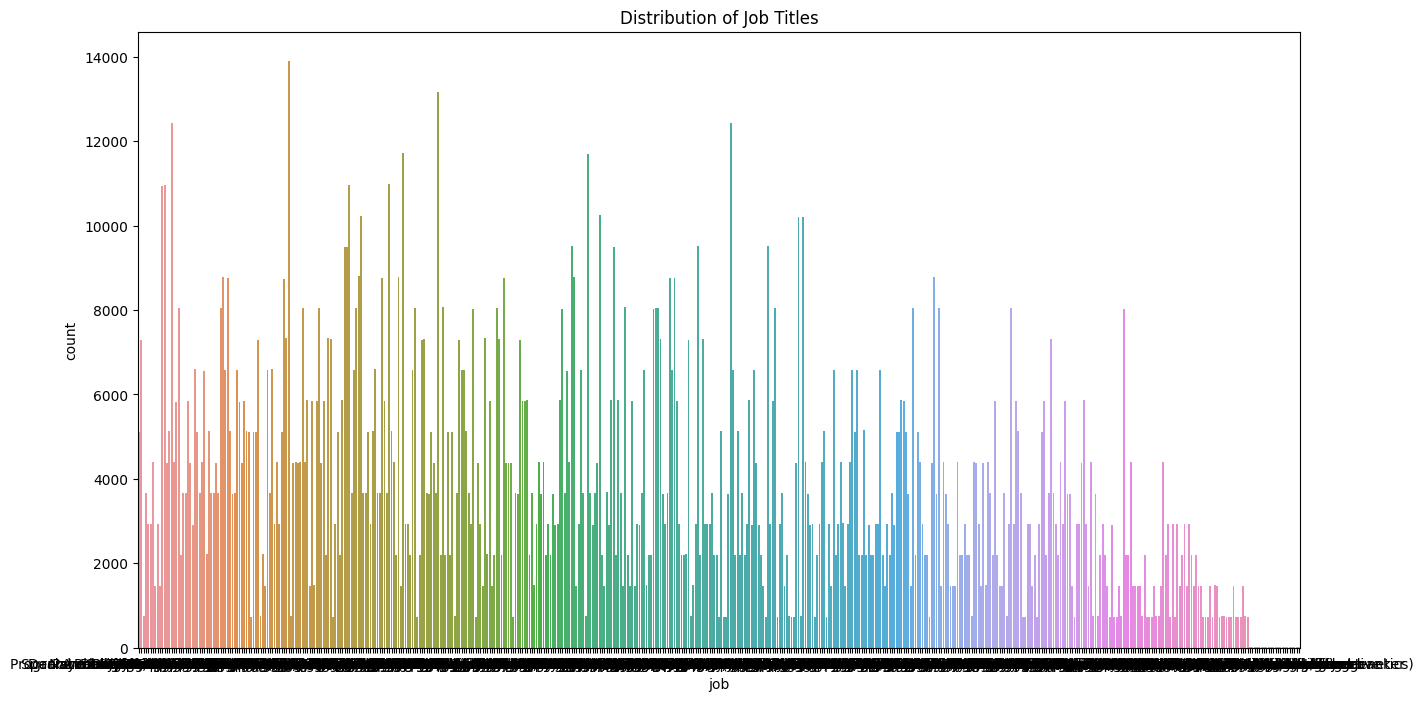

In [11]:
# Plot the distribution of the 'job' feature
plt.figure(figsize=(15, 8))
sns.countplot(x="job", data=df_complete)
plt.title('Distribution of Job Titles')
plt.show()

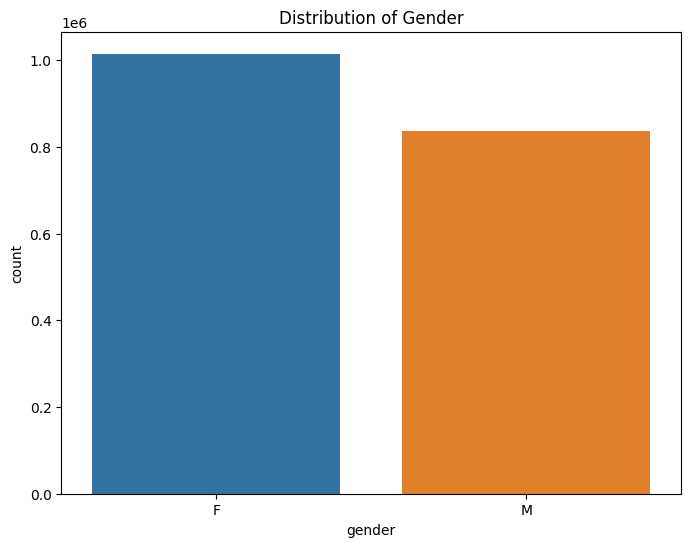

In [12]:
# Plot the distribution of the 'gender' feature
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", data=df_complete)
plt.title('Distribution of Gender')
plt.show()

In [13]:
df_complete["is_fraud"].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

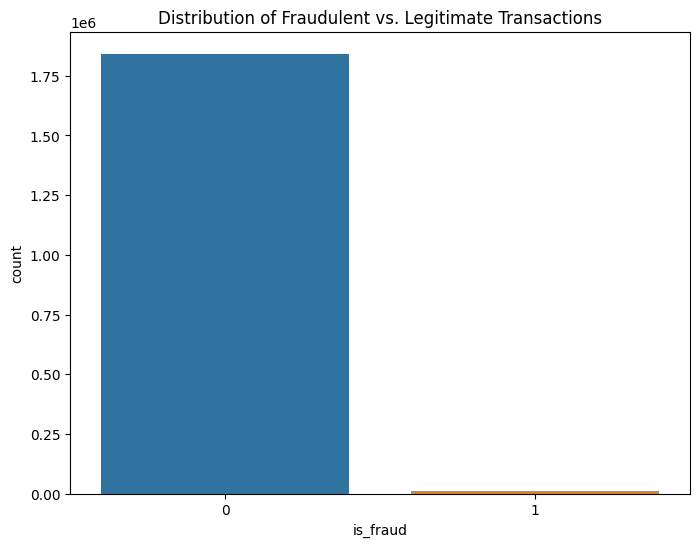

In [14]:
# Plot the distribution of the 'is_fraud' target variable
plt.figure(figsize=(8, 6))
sns.countplot(x="is_fraud", data=df_complete)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.show()

In [15]:
# Drop unnecessary columns
df_complete = df_complete.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'dob', 'trans_num', 'unix_time'], axis=1)

In [16]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_complete[column] = label_encoders[column].fit_transform(df_complete[column])

In [17]:
# Split data into features and target variable
X = df_complete.drop('is_fraud', axis=1)
y = df_complete['is_fraud']

is_fraud
0    1842743
1       9651
Name: count, dtype: int64


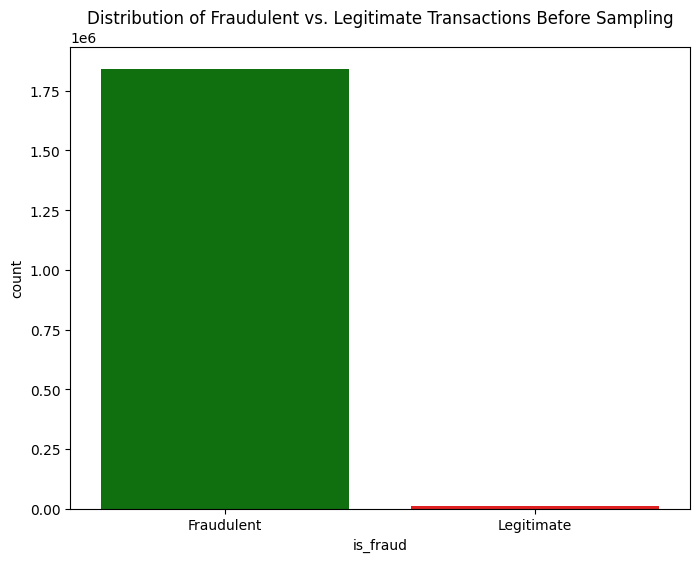

is_fraud
0    9651
1    9651
Name: count, dtype: int64


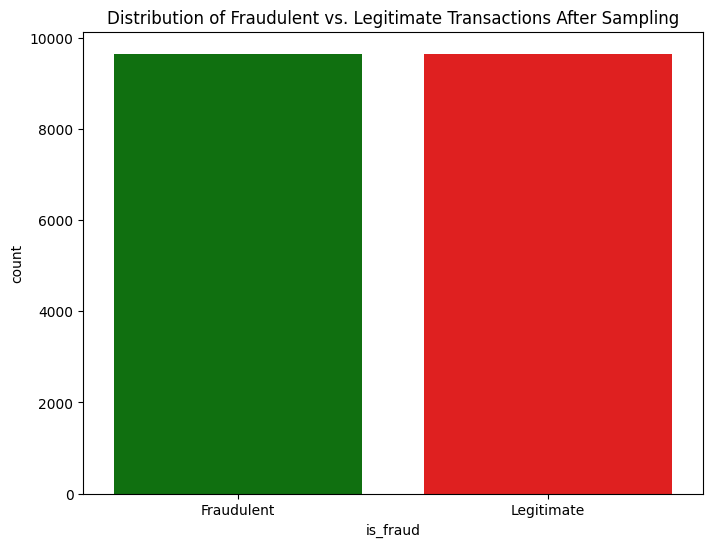

In [18]:
# Handle imbalanced dataset
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print(y.value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette={0: "green", 1: "red"})
plt.xticks([0, 1], ['Fraudulent', 'Legitimate'])
plt.title('Distribution of Fraudulent vs. Legitimate Transactions Before Sampling')
plt.show()

print(y_res.value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x=y_res, palette={0: "green", 1: "red"})
plt.xticks([0, 1], ['Fraudulent', 'Legitimate'])
plt.title('Distribution of Fraudulent vs. Legitimate Transactions After Sampling')
plt.show()




In [19]:
# Scale numerical features
scaler = StandardScaler()
X_res[['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']] = scaler.fit_transform(X_res[['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']])

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [21]:
# Initialize models
log_reg = LogisticRegression()
svm = SVC(kernel="linear")
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)

In [22]:
# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [23]:
# Evaluate models
y_pred_log_reg = log_reg.predict(X_test)
acc1= accuracy_score(y_test, y_pred_log_reg)
y_pred_svm = svm.predict(X_test)
acc2=accuracy_score(y_test, y_pred_svm)
y_pred_random_forest = random_forest.predict(X_test)
acc3= accuracy_score(y_test, y_pred_random_forest)

In [24]:
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy:{acc1*100:.2f}%")

Logistic Regression:
[[1143  786]
 [ 869 1063]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1929
           1       0.57      0.55      0.56      1932

    accuracy                           0.57      3861
   macro avg       0.57      0.57      0.57      3861
weighted avg       0.57      0.57      0.57      3861

Accuracy:57.14%


In [25]:
print("\nSupport Vector Machine:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy:{acc2*100:.2f}%")


Support Vector Machine:
[[1873   56]
 [ 747 1185]]
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      1929
           1       0.95      0.61      0.75      1932

    accuracy                           0.79      3861
   macro avg       0.83      0.79      0.79      3861
weighted avg       0.83      0.79      0.79      3861

Accuracy:79.20%


In [26]:
print("\nRandom Forest:")
print(confusion_matrix(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))
print(f"Accuracy:{acc3*100:.2f}%")


Random Forest:
[[1864   65]
 [ 136 1796]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1929
           1       0.97      0.93      0.95      1932

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861

Accuracy:94.79%
